# Example-12: Gingerbreadman map

In [1]:
# Import

import numpy

from tqdm import tqdm

# JAX

import jax
from jax import jit
from jax import vmap
from jax import jacrev

# Forward and inverse mapping

from tohubohu.util import gingerbread_man_forward
from tohubohu.util import gingerbread_man_inverse

# Tohubohu

from tohubohu import rem
from tohubohu import exponential
from tohubohu import frequency
from tohubohu import fma
from tohubohu import gali
from tohubohu import fli

# Plotting

from matplotlib import pyplot as plt
from matplotlib import colormaps

cmap = colormaps.get_cmap('viridis')
cmap.set_bad(color='lightgray')

cmap_r = colormaps.get_cmap('viridis_r')
cmap_r.set_bad(color='lightgray')

In [2]:
# Set data type

jax.config.update("jax_enable_x64", True)

In [3]:
# Set device

device, *_ = jax.devices('cuda')
jax.config.update('jax_default_device', device)

In [4]:
# Set number of iteratons

n = 2**12

In [5]:
# Set initial grid in (qx, qy) plane

m = 2001

qs = jax.numpy.linspace(-10.0, 15.0, m)
ps = jax.numpy.linspace(-10.0, 15.0, m)
xs = jax.numpy.stack(jax.numpy.meshgrid(qs, ps, indexing='ij')).swapaxes(-1, 0).reshape(m*m, -1)
xs = jax.numpy.array_split(xs, m)

## REM

In [6]:
# REM

@jit
def evaluate_rem(x, epsilon=1.0E-16):
    return jax.numpy.log10(epsilon + rem(n, gingerbread_man_forward, gingerbread_man_inverse, epsilon=0.0)(x))

x = jax.numpy.array([0.1, 0.1])
out = evaluate_rem(x)

In [7]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_rem))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:14<00:00, 26.74it/s]


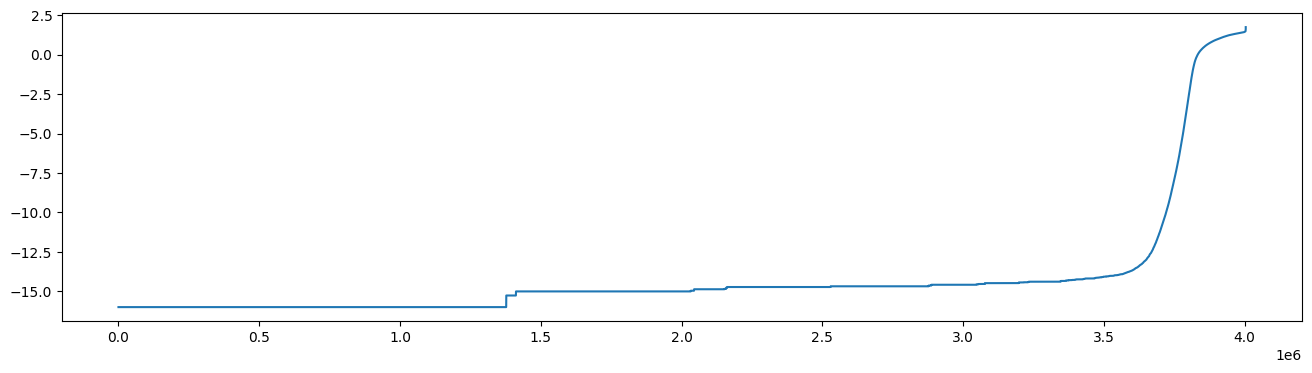

In [8]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

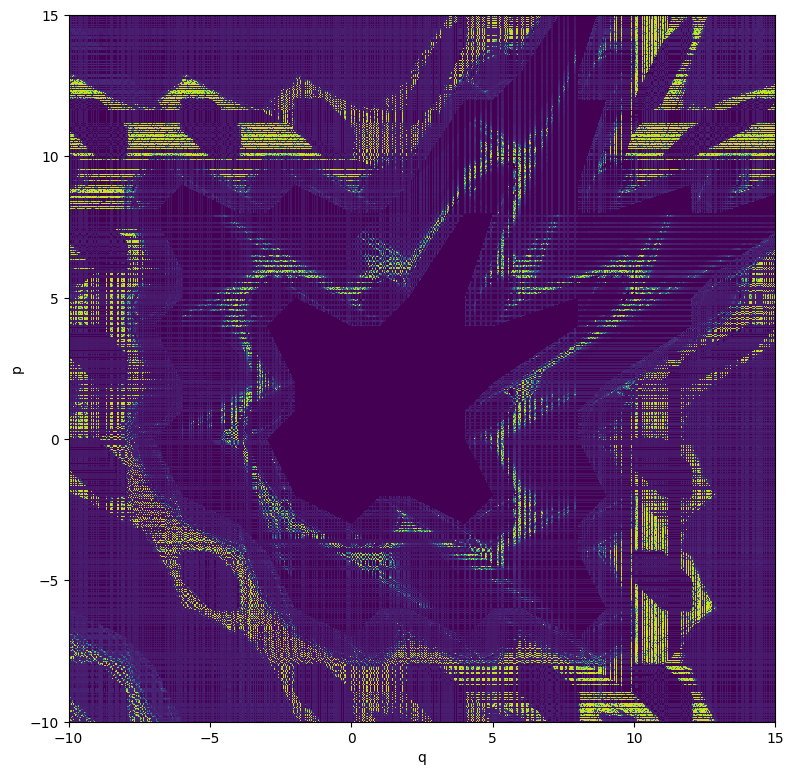

In [9]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=-16, vmax=2.5, origin='lower', cmap=cmap, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()

## Frequency (fractional part)

In [10]:
# Frequency

window = exponential(n)

@jit
def evaluate_frequency(x):
    return frequency(window, gingerbread_man_forward)(x).squeeze()

x = jax.numpy.array([0.1, 0.1])
out = evaluate_frequency(x)

In [11]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_frequency))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:00<00:00, 33.16it/s]


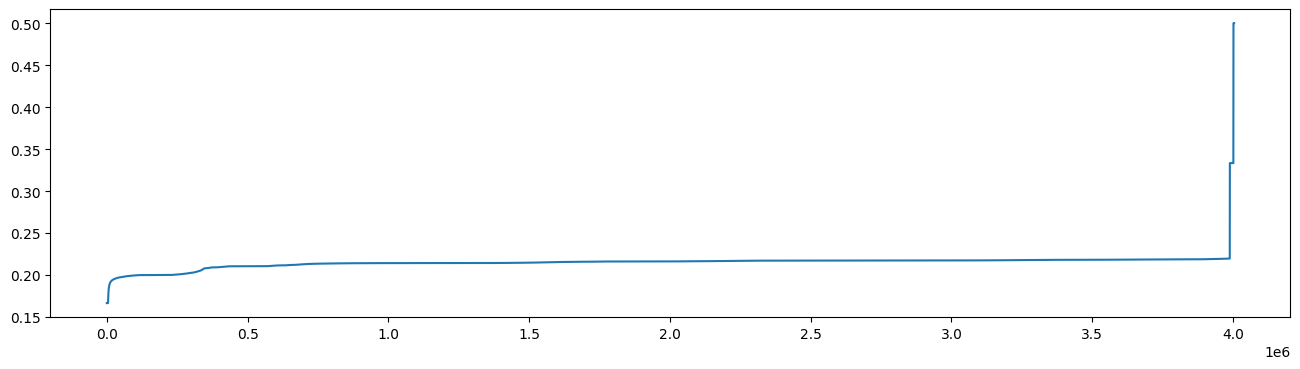

In [12]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

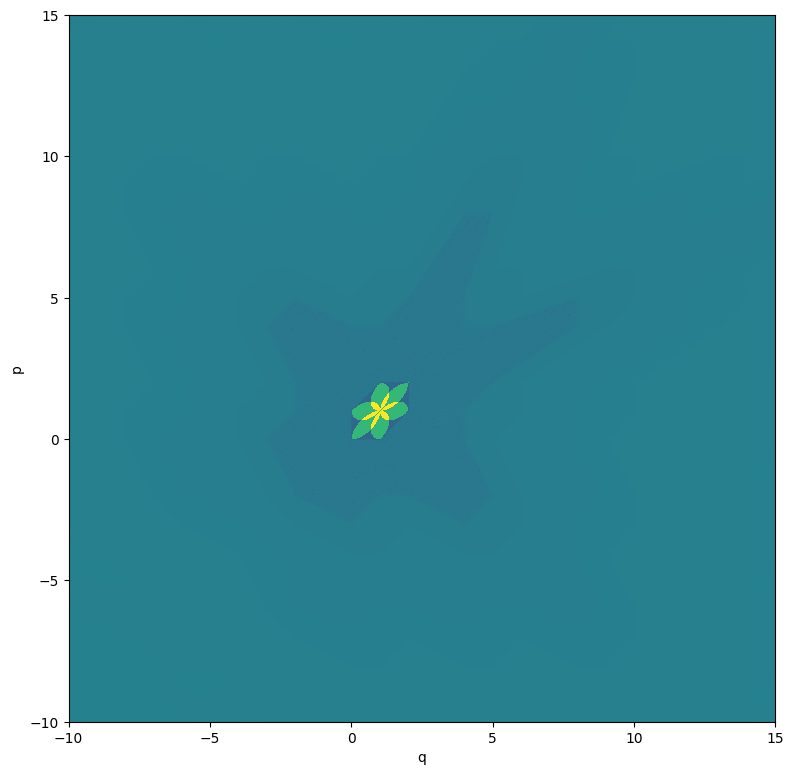

In [13]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=0.0, vmax=0.5, origin='lower', cmap=cmap, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()

## Frequency (derivative norm)

In [14]:
# Frequency (derivative)

window = exponential(n)

@jit
def evaluate_frequency_derivative_norm(x, epsilon=1.0E-16):
    return jax.numpy.log10(epsilon + jax.numpy.linalg.norm(jacrev(evaluate_frequency)(x).squeeze()))

x = jax.numpy.array([0.1, 0.1])
out = evaluate_frequency_derivative_norm(x)

In [15]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_frequency_derivative_norm))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:37<00:00, 12.73it/s]


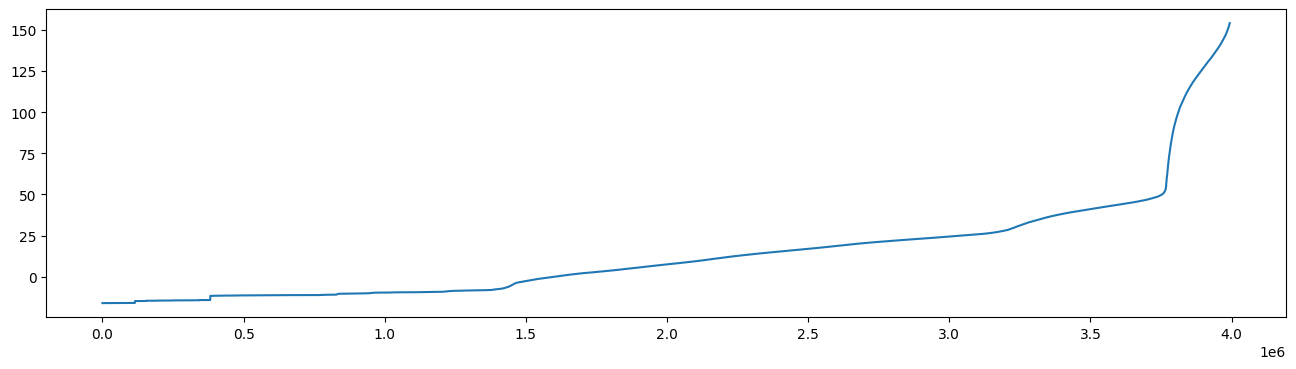

In [16]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

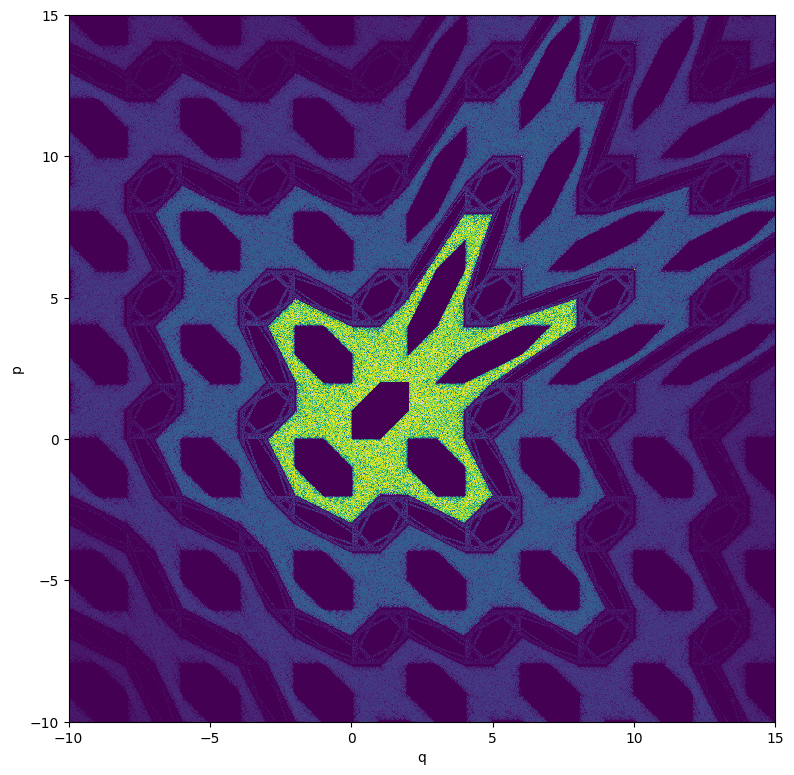

In [17]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=0.0, vmax=150, origin='lower', cmap=cmap, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()

## FMA

In [18]:
# FMA

@jit
def evaluate_fma(x, epsilon=1.0E-16):
    return jax.numpy.log10(epsilon + jax.numpy.sqrt(jax.numpy.sum(jax.numpy.diff(fma(2**1, window, gingerbread_man_forward)(x).T)**2)))

x = jax.numpy.array([0.1, 0.1])
out = evaluate_fma(x)

In [19]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_fma))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:00<00:00, 16.59it/s]


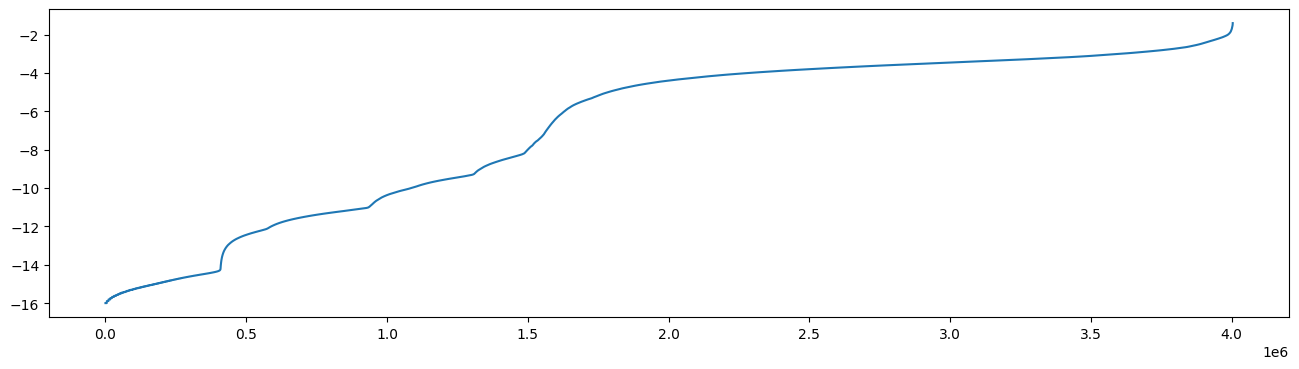

In [20]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

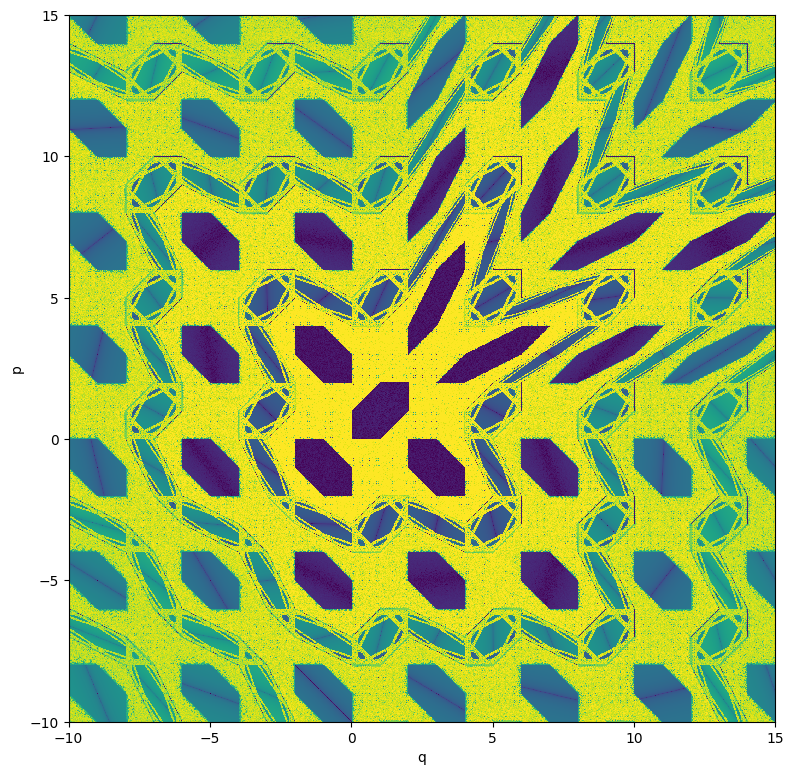

In [21]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=-16, vmax=-3, origin='lower', cmap=cmap, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()

## GALI

In [22]:
# GALI

@jit
def evaluate_gali(x, epsilon=1.0E-16):
    return jax.numpy.log10(epsilon + gali(n, gingerbread_man_forward)(x, vs))

x = jax.numpy.array([0.25, 0.25])
vs = jax.numpy.array([[1.0, 0.0], [0.0, 1.0]])

out = evaluate_gali(x)

In [23]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_gali))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:14<00:00, 26.95it/s]


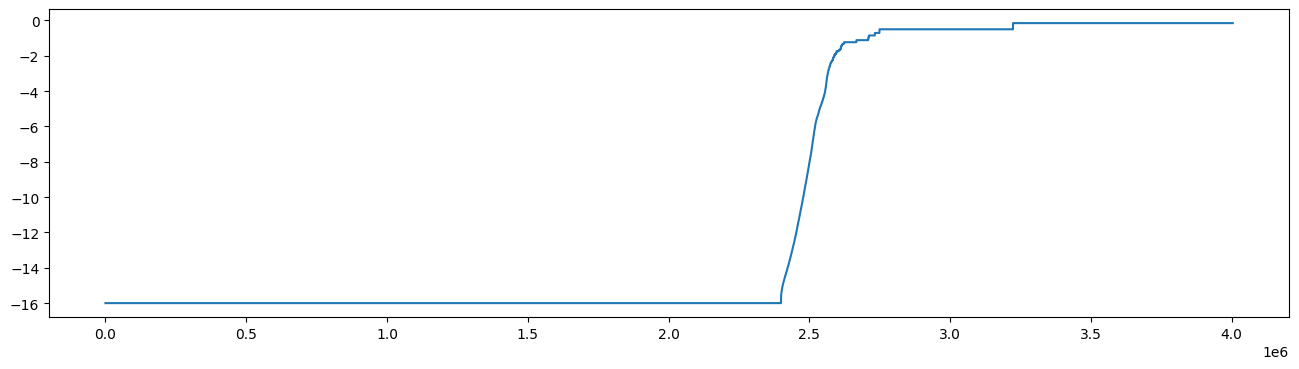

In [24]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

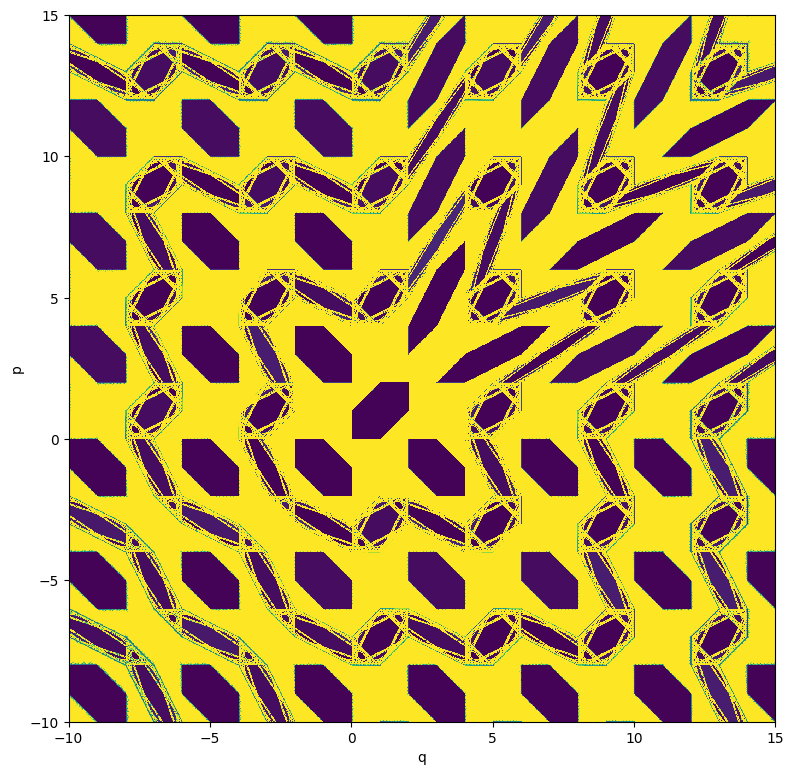

In [25]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=-16, vmax=0.0, origin='lower', cmap=cmap_r, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()

## FLI

In [26]:
# FLI

@jit
def evaluate_fli(x):
    return fli(n, gingerbread_man_forward, normalize=False)(x, v)

x = jax.numpy.array([0.1, 0.1])
v = jax.numpy.array([1.0, 0.0])

out = evaluate_fli(x)

In [27]:
# Evaluate indicator

xb, *xr = xs
fj = jit(vmap(evaluate_fli))
out = [fj(xb)]

for xb in tqdm(xr):
    out.append(fj(xb))
out = jax.numpy.concatenate(out)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.64it/s]


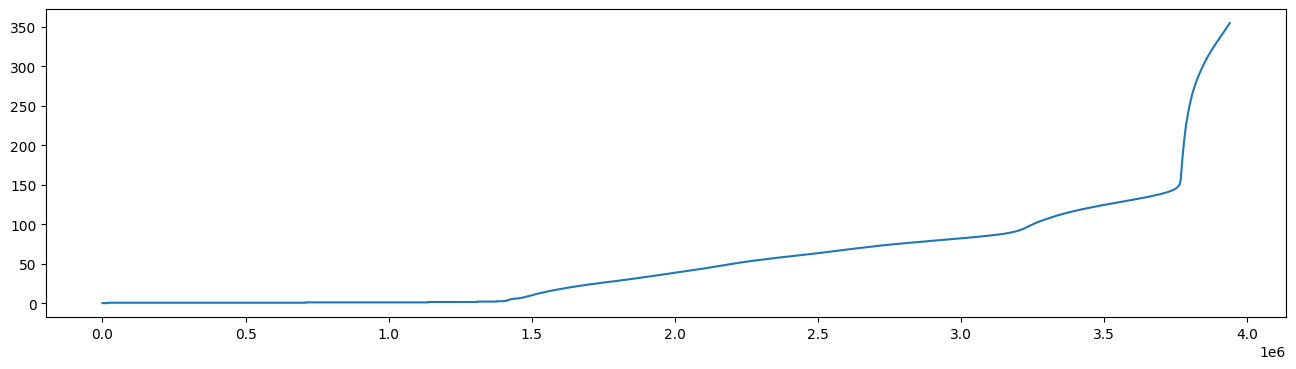

In [28]:
# Plot indicator (full range)

plt.figure(figsize=(16, 4))
plt.plot(jax.numpy.sort(out))
plt.show()

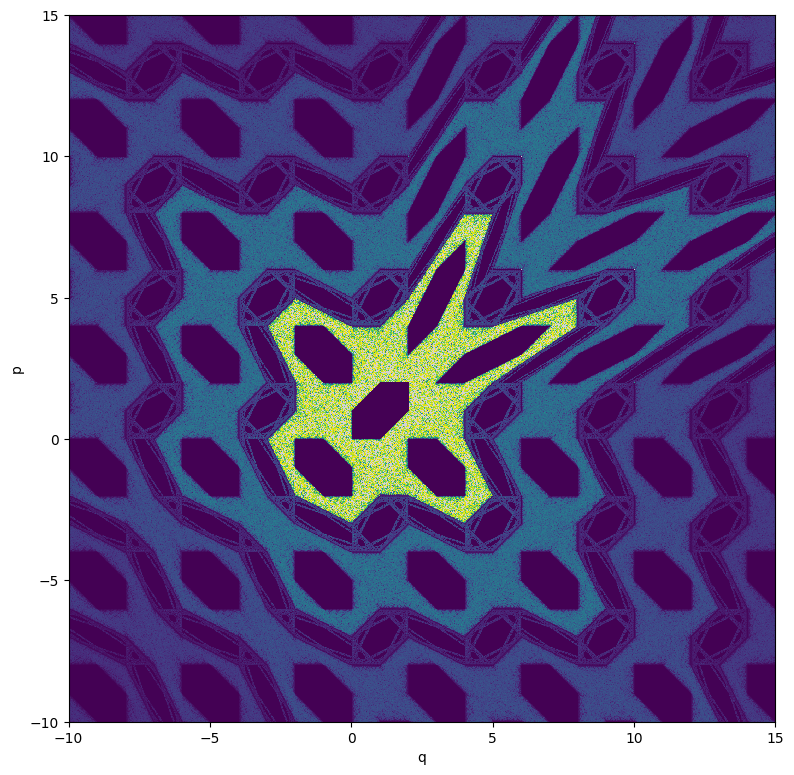

In [29]:
# Color plot

data = numpy.array(out)
data = data.reshape(m, m)

plt.figure(figsize=(8, 8))
plt.imshow(data, aspect='equal', vmin=0.0, vmax=350, origin='lower', cmap=cmap, interpolation='nearest', extent=(-10., 15.0, -10.0, 15.0))
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.show()